# Analisi della Strategia Contrarian nel Forex

Questo notebook esplora e testa una strategia di trading contrarian applicata a diverse coppie di valute del mercato Forex. L'obiettivo è spiegare in modo divulgativo la logica della strategia, come viene implementata nel codice e come interpretare i risultati ottenuti.

## Cosa troverai in questo notebook
- **Spiegazione della strategia contrarian**
- **Descrizione del workflow di test**
- **Visualizzazione e interpretazione dei risultati**


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np


tickers = ['EURUSD=X', 'GBPUSD=X', 'EURJPY=X', 'EURCHF=X', 'AUDUSD=X', 'USDJPY=X', 'USDCHF=X', 'USDCAD=X', 'NZDUSD=X', 'GBPJPY=X', 'EURCAD=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCAD=X', 'AUDCHF=X', 'NZDJPY=X', 'NZDCAD=X', 'NZDCHF=X']
start_date = '2010-01-01'
end_date = '2025-12-31'

## Cos'è una Strategia Contrarian?

Una strategia contrarian si basa sull'idea di andare contro la tendenza recente del mercato. In pratica:
- Se un asset ha avuto una performance negativa il giorno precedente, la strategia assume una posizione LONG (acquisto) il giorno successivo, aspettandosi un rimbalzo.
- Se invece il rendimento del giorno precedente è stato positivo, la strategia non prende posizione.

Questa logica sfrutta i possibili eccessi di reazione dei mercati, puntando su un ritorno verso la media (mean reversion).

### Implementazione nel Codice
Nel file `strategy_contrarian.py`, la funzione `strategy`:
- Prende i prezzi di chiusura giornalieri.
- Calcola i ritorni percentuali giornalieri.
- Applica la logica contrarian: se il ritorno del giorno precedente è negativo, entra a mercato; altrimenti resta flat.
- Calcola i ritorni cumulativi della strategia e li confronta con un approccio buy-and-hold.


In [ ]:
# Importa la funzione strategy dal modulo strategy_contrarian
from strategy_contrarian import strategy

## Come viene testata la strategia in questo notebook?

1. **Selezione dei Tickers:**
   - Vengono selezionate diverse coppie di valute Forex per diversificare il test.
2. **Download dei Dati:**
   - Per ogni ticker, vengono scaricati i dati storici dal 2010 a oggi tramite Yahoo Finance.
3. **Applicazione della Strategia:**
   - La funzione `strategy` viene applicata ai dati di ciascun ticker.
   - I risultati (equity line) vengono salvati per ogni valuta.
4. **Visualizzazione dei Risultati:**
   - Tutte le equity line vengono sovrapposte in un unico grafico per confrontare l'andamento della strategia sulle diverse valute.

Questo approccio permette di valutare la robustezza e la coerenza della strategia su più mercati.

Processando EURUSD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per EURUSD=X
Processando GBPUSD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per GBPUSD=X
Processando EURJPY=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per EURJPY=X
Processando EURCHF=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per EURCHF=X
Processando AUDUSD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per AUDUSD=X
Processando USDJPY=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per USDJPY=X
Processando USDCHF=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per USDCHF=X
Processando USDCAD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per USDCAD=X
Processando NZDUSD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per NZDUSD=X
Processando GBPJPY=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per GBPJPY=X
Processando EURCAD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per EURCAD=X
Processando GBPCHF=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per GBPCHF=X
Processando AUDJPY=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per AUDJPY=X
Processando AUDCAD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per AUDCAD=X
Processando AUDCHF=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per AUDCHF=X
Processando NZDJPY=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per NZDJPY=X
Processando NZDCAD=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per NZDCAD=X
Processando NZDCHF=X...


[*********************100%***********************]  1 of 1 completed


Strategia applicata con successo per NZDCHF=X

Processamento completato per 18 tickers.


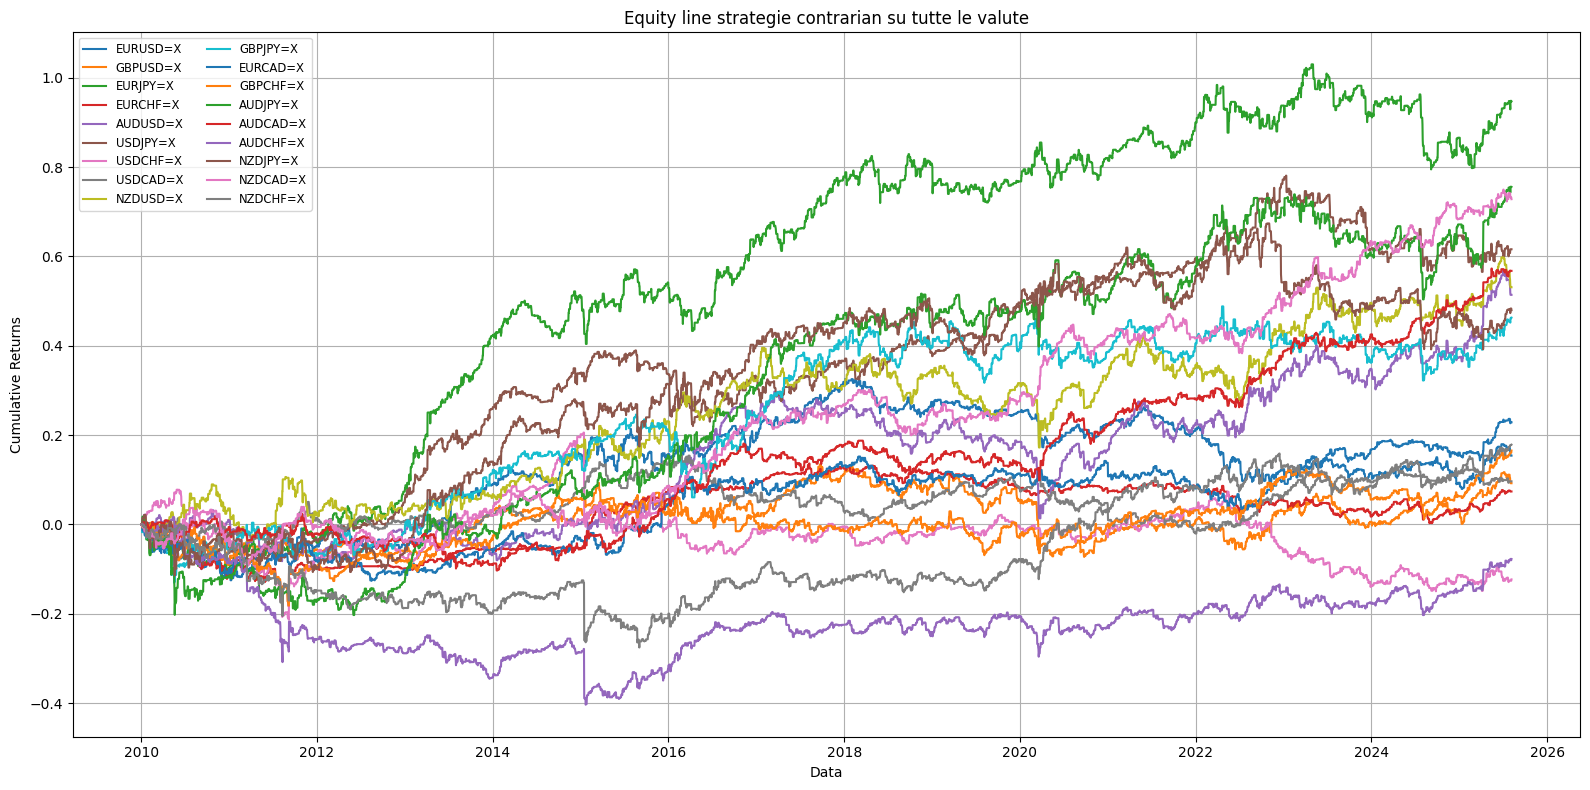

In [3]:
# Scarica i dati per tutti i tickers e applica la strategia contrarian
results = {}
equity_lines = pd.DataFrame()

for ticker in tickers:
    print(f"Processando {ticker}...")
    try:
        # Scarica i dati per il ticker corrente
        data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
        
        if not data.empty:
            # Applica la strategia contrarian e salva la equity line
            equity = strategy(data, timeframe='D')
            equity.name = ticker
            equity_lines = pd.concat([equity_lines, equity], axis=1)
            
            # Salva i risultati per ulteriori analisi se necessario
            results[ticker] = data
            print(f"Strategia applicata con successo per {ticker}")
        else:
            print(f"Nessun dato disponibile per {ticker}")
            
    except Exception as e:
        print(f"Errore durante il processo di {ticker}: {str(e)}")

print(f"\nProcessamento completato per {len(results)} tickers.")

# Plot unico con tutte le equity line sovrapposte
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
for col in equity_lines.columns:
    plt.plot(equity_lines.index, equity_lines[col], label=col)
plt.title('Equity line strategie contrarian su tutte le valute')
plt.xlabel('Data')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretazione dei Risultati e del Grafico

Nel grafico finale vengono mostrate le equity line (cioè l'andamento cumulativo dei ritorni) della strategia contrarian su tutte le valute considerate.

- **Ogni linea rappresenta una valuta:** Più la linea sale, più la strategia è stata profittevole su quella valuta.
- **Confronto tra valute:** Permette di vedere su quali mercati la strategia funziona meglio o peggio.
- **Robustezza:** Se molte linee sono crescenti e stabili, la strategia mostra robustezza su diversi mercati.

> **Nota:** La strategia contrarian non garantisce profitti e può avere periodi di drawdown. È importante analizzare anche la volatilità e la coerenza dei risultati nel tempo.

## Conclusioni e Spunti per Approfondimenti

Abbiamo visto come una semplice strategia contrarian possa essere testata su molteplici valute in modo sistematico. Questo tipo di analisi permette di:
- Valutare la robustezza di una strategia su diversi mercati.
- Individuare eventuali anomalie o mercati particolarmente favorevoli/sfavorevoli.

### Possibili Estensioni
- Analizzare periodi diversi o time frame differenti.
- Integrare filtri di volatilità o condizioni di money management.
- Confrontare la strategia con altre (momentum, buy-and-hold, ecc.).

> **Ricorda:** Nessuna strategia è infallibile. È fondamentale testare, validare e comprendere i limiti di ogni approccio prima di applicarlo in reale.